This model is made for the sntiment analysis

In [25]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [26]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
df = pd.read_csv("data.csv")

In [29]:
df.columns = ['target','id','date','flag','user','text']

In [30]:
df.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [31]:
df = df.drop(columns =['id','date','flag','user'])

In [32]:
df['text_len'] = df['text'].apply(lambda x: len(x))

In [33]:
df.head(1)

,target,text,text_len
0,0,is upset that he can't update his Facebook by ...,111


<AxesSubplot:xlabel='text_len', ylabel='Count'>

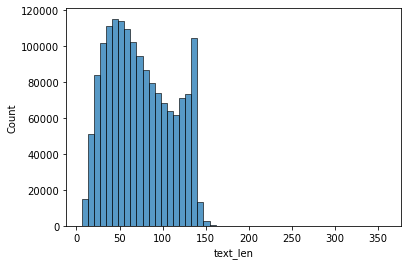

In [34]:
sns.histplot(df['text_len'],bins=50)

In [35]:
#DF is in some order so need to randomize it 
print(df['target'][0:800000].value_counts())
df = df.sample(frac=1)
print(df['target'][0:800000].value_counts())

0    799999
4         1
Name: target, dtype: int64
4    400075
0    399925
Name: target, dtype: int64


In [36]:
train_portion = int((2/3) * len(df))
df_test = df[train_portion:]
df = df[0:train_portion]

In [37]:
print(df_test.shape)
print(df.shape)

(533333, 3)
(1066666, 3)


In [38]:
tokenizer = RegexpTokenizer(r'\w+')

In [39]:
def remove_mention(text):
    text_split = text.split(" ")
    new_text = ""
    for i in text_split:
        #print(i)
        if "@" not in i:
            new_text += i + " "
    #print(new_text)
    return new_text[0:len(new_text)-1]

In [40]:
def tokenize(text):
    text = remove_mention(text)
    words = tokenizer.tokenize(text.lower())
    filtered = []
    for i in words:
        if not i in stopwords.words():
            filtered.append(i)
    for j in range(len(filtered)):
        filtered[j] = lemmatizer.lemmatize(filtered[j])
    return filtered

In [41]:
test_df = df[0:20]

In [42]:
test_df['tokenized_text'] = test_df['text'].apply(tokenize)

<ipython-input-42-944f8d003c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['tokenized_text'] = test_df['text'].apply(tokenize)


In [43]:
pd.set_option('display.max_colwidth', None)

In [44]:
#Testing dummy df
test_df.head(10)

,target,text,text_len,tokenized_text
765426,0,"I'm so ready to be done working, but don't know what time I get to be done",75,"[ready, done, working, know, time, get, done]"
1100679,4,"@cakeymoo ^,^ goodluck in the next webcast!",44,"[goodluck, next, webcast]"
1272246,4,"@davinington Ya that was MY SONG last summer, i was riding that shit eeeeeverywhere! lol but what you know Wayne?",114,"[song, last, summer, riding, shit, eeeeeverywhere, lol, know, wayne]"
1272668,4,Staying in the Old Hobart hotel tonight. It's old and awesome. We're gonna sex this bed up good tonight.,105,"[staying, old, hobart, tonight, old, awesome, gonna, sex, bed, good, tonight]"
733594,0,had a really really rough nite.... now feeling it!,51,"[really, really, rough, nite, feeling]"
119106,0,@Dharmishta can't call. my cellphone's dead could IM/twitt though. we'll be in boston in an hour and a half @isforinsects,122,"[call, cellphone, dead, could, twitt, though, boston, hour, half]"
11857,0,"im lonely keep me company! 22 female, Houston - Texas",54,"[lonely, keep, company, 22, female, houston, texas]"
142632,0,hopes her headache goes away before the cinema this evening,60,"[hope, headache, go, away, cinema, evening]"
273841,0,@amycurrie zOMGPONIES! I want a Bento Box! Damn lack of cheap quality asian food in northern Sweden,100,"[zomgponies, bento, box, damn, lack, cheap, quality, asian, food, northern, sweden]"
1084107,4,"@WhoIsAlexParker of course!!! It has to be ill stuff though, I'm sure it will be I mean...your friggin ALEX PARKER.",116,"[course, stuff, though, sure, mean, friggin, alex, parker]"


In [48]:
pd.set_option('display.max_colwidth', 80)
word_dict = {}

In [49]:
partitioned_df = df[0:90000]

In [47]:
partitioned_df['tokenized_text'] = partitioned_df['text'].apply(tokenize)

KeyboardInterrupt: 

In [ ]:
partitioned_df.head()

In [ ]:
partitioned_df.to_parquet('training_data.parquet')

In [ ]:
partitioned_df.to_parquet('test_data.parquet')